In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('placement.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


<Axes: ylabel='Density'>

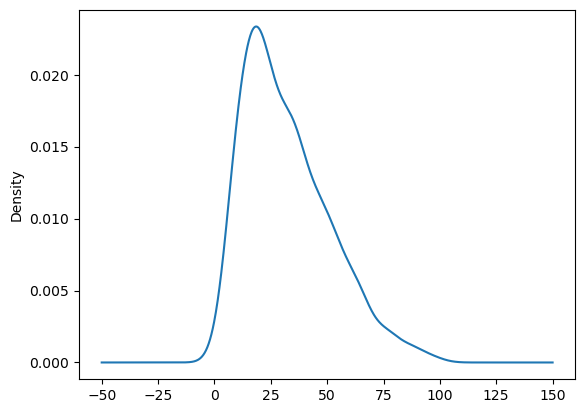

In [3]:
df['placement_exam_marks'].plot(kind='kde')

In [4]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

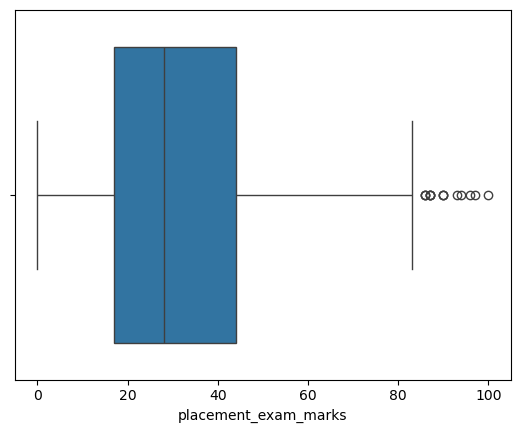

In [7]:
sns.boxplot(x='placement_exam_marks',data=df)

In [8]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [9]:
percentile25,percentile75

(np.float64(17.0), np.float64(44.0))

In [10]:
iqr=percentile75-percentile25

In [11]:
iqr

np.float64(27.0)

In [13]:
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile25-1.5*iqr

In [14]:
upperlimit,lowerlimit

(np.float64(84.5), np.float64(-23.5))

# finding outliers

In [18]:
df[df['placement_exam_marks'] > upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Trimming

In [19]:
newdf=df[df['placement_exam_marks'] < upperlimit]

In [20]:
newdf.shape

(985, 3)

<Axes: xlabel='placement_exam_marks'>

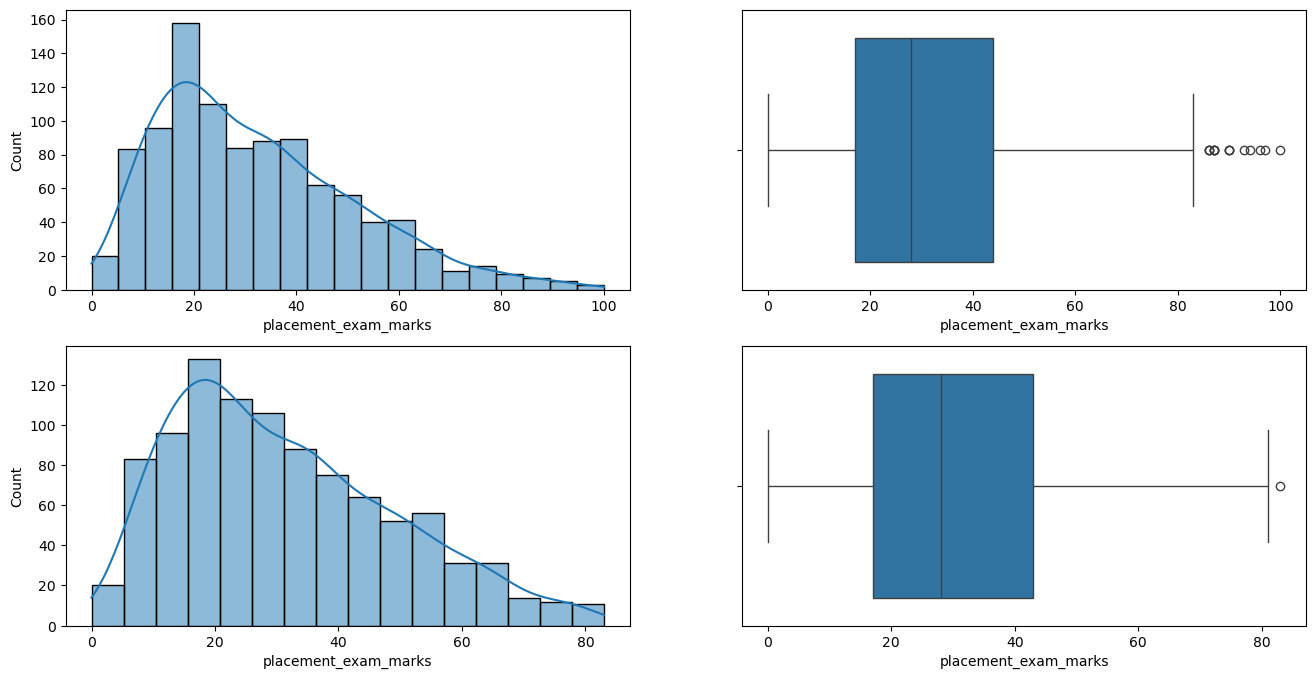

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(x='placement_exam_marks',data=df)

plt.subplot(2,2,3)
sns.histplot(newdf['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(x='placement_exam_marks',data=newdf)

# Capping


In [28]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upperlimit,
    upperlimit,
    np.where(
        new_df_cap['placement_exam_marks'] < lowerlimit,
        lowerlimit,
        new_df_cap['placement_exam_marks']
    )
)


In [29]:
new_df_cap.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

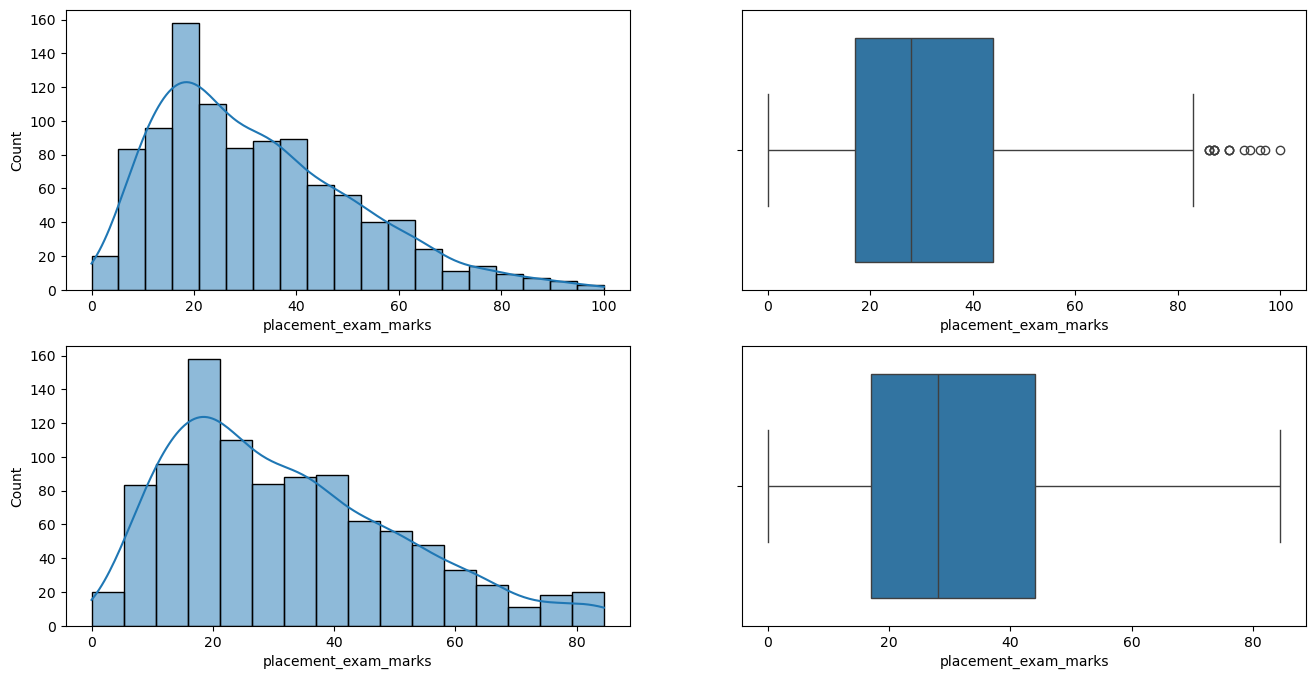

In [32]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(x='placement_exam_marks',data=df)

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(x='placement_exam_marks',data=new_df_cap)